# Random Forest Regression Analysis

##### Author: E. Thompson-Becker

Analysis 1: includes independent variables  SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, WSPM  
Analysis 2: incldude air pollutant variables SO2, NO2, CO, O3

In [1]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import metrics
import statsmodels.api as sm
from yellowbrick.regressor import ResidualsPlot

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [20]:
#import data set
data = pd.read_csv("Shunyi-data_norm-date.csv")

#remove RAIN
data = data.drop(['RAIN'],axis=1)
data = data.drop(['year'], axis=1)
data = data.drop(['month'],axis=1)
#check data set
data.head()


,Unnamed: 0,date,hour,PM25,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,WSPM
0,0,2013-03-01,0,0.001065,0.004012,0.011371,0.023438,0.020202,0.124568,0.277003,0.689781,0.244094,0.726562
1,1,2013-03-01,1,0.010650,0.010030,0.011371,0.019531,0.020202,0.133102,0.273519,0.695255,0.231496,0.734375
2,2,2013-03-01,2,0.012780,0.012036,0.011371,0.019531,0.010101,0.061979,0.263066,0.697080,0.204724,0.671875
3,3,2013-03-01,3,0.010650,0.010030,0.011371,0.011719,0.010101,0.061979,0.256098,0.717153,0.200000,0.515625
4,4,2013-03-01,4,0.010650,0.010030,0.011371,0.011719,0.010101,0.030685,0.250871,0.724453,0.206299,0.351562


## Random Forest Regression Analysis 1
Includes all independent variables: SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, WSPM

In [21]:
#setting the independent and dependent variables
x = data[['SO2', 'NO2','CO','O3','TEMP','PRES','DEWP','WSPM']]
y = data['PM25'] 

In [22]:
#use training and test sets found in data preparation
#Splitting according to the above description
xtrain1, xtest1 = data.iloc[:2922,5:13], data.iloc[2922:5844, 5:13]
xtrain2, xtest2 = data.iloc[:5844,5:13 ], data.iloc[5844:8766,5:13 ]
xtrain3, xtest3 = data.iloc[:8766,5:13 ], data.iloc[8766:11688,5:13 ]
xtrain4, xtest4 = data.iloc[:11688,5:13 ], data.iloc[11688:14610,5:13 ]
xtrain5, xtest5 = data.iloc[:14610,5:13 ], data.iloc[14610:17532,5:13 ]
xtrain6, xtest6 = data.iloc[:17532,5:13 ], data.iloc[17532:20454,5:13 ]
xtrain7, xtest7 = data.iloc[:20454,5:13 ], data.iloc[20454:23376,5:13 ]
xtrain8, xtest8 = data.iloc[:23376,5:13 ], data.iloc[23376:26298,5:13 ]
xtrain9, xtest9 = data.iloc[:26298,5:13 ], data.iloc[26298:29220,5:13 ]
xtrain10, xtest10 = data.iloc[:29220,5:13 ], data.iloc[29220:32142,5:13 ]
xtrain11, xtest11 = data.iloc[:32142,5:13 ], data.iloc[32142:35063,5:13 ]

#Splitting according to the above description
ytrain1, ytest1 = data.iloc[:2922,3 ], data.iloc[2922:5844,3 ]
ytrain2, ytest2 = data.iloc[:5844, 3], data.iloc[5844:8766, 3]
ytrain3, ytest3 = data.iloc[:8766,3 ], data.iloc[8766:11688, 3]
ytrain4, ytest4 = data.iloc[:11688,3 ], data.iloc[11688:14610,3 ]
ytrain5, ytest5 = data.iloc[:14610,3 ], data.iloc[14610:17532, 3]
ytrain6, ytest6 = data.iloc[:17532,3 ], data.iloc[17532:20454,3 ]
ytrain7, ytest7 = data.iloc[:20454,3 ], data.iloc[20454:23376,3 ]
ytrain8, ytest8 = data.iloc[:23376,3 ], data.iloc[23376:26298,3 ]
ytrain9, ytest9 = data.iloc[:26298, 3], data.iloc[26298:29220,3 ]
ytrain10, ytest10 = data.iloc[:29220,3 ], data.iloc[29220:32142,3 ]
ytrain11, ytest11 = data.iloc[:32142,3 ], data.iloc[32142:35063, 3]

In [23]:
#create regressor object
#n_estimators = number of trees in the random forest
rndf = RandomForestRegressor(n_estimators = 100, random_state = 0)

# fit the regressor with x and y data
rf1 = rndf.fit(xtrain1, ytrain1) 

In [24]:
#predict the values
y_pred1 = rf1.predict(xtest1)
print("Prediction for test set: {}".format(y_pred1))

#Actual value and the predicted value
rf1_diff = pd.DataFrame({'Actual value': ytest1, 'Predicted value': y_pred1})
rf1_diff

Prediction for test set: [0.23217252 0.21445154 0.2315229  ... 0.04084132 0.02221512 0.02791267]


,Actual value,Predicted value
2922,0.200213,0.232173
2923,0.241747,0.214452
2924,0.279020,0.231523
2925,0.279020,0.229180
2926,0.236422,0.107529
...,...,...
5839,0.019169,0.035016
5840,0.007455,0.031161
5841,0.033014,0.040841
5842,0.027689,0.022215


In [25]:
#trial 1
meanAbErr1 = metrics.mean_absolute_error(ytest1, y_pred1)
meanSqErr1 = metrics.mean_squared_error(ytest1, y_pred1)
rootMeanSqErr1 = np.sqrt(metrics.mean_squared_error(ytest1, y_pred1))
meanAbsPer1 = metrics.mean_absolute_percentage_error(ytest1, y_pred1)
r21 = metrics.r2_score(ytest1,y_pred1)
Adj_r21 = 1-(1-r21)*(len(xtrain1)-1)/(len(xtrain1)-9-1)
print('R squared:',r21)
print('Adjusted R squared:',Adj_r21)
print('Mean Absolute Error:', meanAbErr1)
print('Mean Absolute Percentage Error: {:.2f}'.format(meanAbsPer1))
print('Mean Square Error:', meanSqErr1)
print('Root Mean Square Error:', rootMeanSqErr1)

R squared: -0.11370165620087214
Adjusted R squared: -0.11714372862731715
Mean Absolute Error: 0.05826324331764202
Mean Absolute Percentage Error: 4.07
Mean Square Error: 0.005683344401308424
Root Mean Square Error: 0.07538795925947607


In [9]:
#repeat steps for other trials 

# fit the regressor with x and y data
rf2 = rndf.fit(xtrain2, ytrain2)
#predict the values
y_pred2 = rf2.predict(xtest2)
#prediction metrix
meanAbErr2 = metrics.mean_absolute_error(ytest2, y_pred2)
meanSqErr2 = metrics.mean_squared_error(ytest2, y_pred2)
rootMeanSqErr2 = np.sqrt(metrics.mean_squared_error(ytest2, y_pred2))
meanAbsPer2 = metrics.mean_absolute_percentage_error(ytest2, y_pred2)
r22 = metrics.r2_score(ytest2,y_pred2)
Adj_r22 = 1-(1-r22)*(len(xtrain2)-1)/(len(xtrain2)-9-1)

In [10]:
# fit the regressor with x and y data
rf3 = rndf.fit(xtrain3, ytrain3)
#predict the values
y_pred3 = rf3.predict(xtest3)
#prediction metrix
meanAbErr3 = metrics.mean_absolute_error(ytest3, y_pred3)
meanSqErr3 = metrics.mean_squared_error(ytest3, y_pred3)
rootMeanSqErr3 = np.sqrt(metrics.mean_squared_error(ytest3, y_pred3))
meanAbsPer3 = metrics.mean_absolute_percentage_error(ytest3, y_pred3)
r23 = metrics.r2_score(ytest3,y_pred3)
Adj_r23 = 1-(1-r21)*(len(xtrain3)-1)/(len(xtrain3)-9-1)

In [11]:
# fit the regressor with x and y data
rf4 = rndf.fit(xtrain4, ytrain4)
#predict the values
y_pred4 = rf4.predict(xtest4)
#prediction metrix 
meanAbErr4 = metrics.mean_absolute_error(ytest4, y_pred4)
meanSqErr4 = metrics.mean_squared_error(ytest4, y_pred4)
rootMeanSqErr4 = np.sqrt(metrics.mean_squared_error(ytest4, y_pred4))
meanAbsPer4 = metrics.mean_absolute_percentage_error(ytest4, y_pred4)
r24 = metrics.r2_score(ytest4,y_pred4)
Adj_r24 = 1-(1-r24)*(len(xtrain4)-1)/(len(xtrain4)-9-1)

In [12]:
# fit the regressor with x and y data
rf5 = rndf.fit(xtrain5, ytrain5)
#predict the values
y_pred5 = rf5.predict(xtest5)
#prediction metrix
meanAbErr5 = metrics.mean_absolute_error(ytest5, y_pred5)
meanSqErr5 = metrics.mean_squared_error(ytest5, y_pred5)
rootMeanSqErr5 = np.sqrt(metrics.mean_squared_error(ytest5, y_pred5))
meanAbsPer5 = metrics.mean_absolute_percentage_error(ytest5, y_pred5)
r25 = metrics.r2_score(ytest5,y_pred5)
Adj_r25 = 1-(1-r25)*(len(xtrain5)-1)/(len(xtrain5)-9-1)

In [13]:
# fit the regressor with x and y data
rf6 = rndf.fit(xtrain6, ytrain6)
#predict the values
y_pred6 = rf6.predict(xtest6)
#prediction metrix
meanAbErr6 = metrics.mean_absolute_error(ytest6, y_pred6)
meanSqErr6 = metrics.mean_squared_error(ytest6, y_pred6)
rootMeanSqErr6 = np.sqrt(metrics.mean_squared_error(ytest6, y_pred6))
meanAbsPer6 = metrics.mean_absolute_percentage_error(ytest6, y_pred6)
r26 = metrics.r2_score(ytest6,y_pred6)
Adj_r26 = 1-(1-r26)*(len(xtrain6)-1)/(len(xtrain6)-9-1)

In [14]:
# fit the regressor with x and y data
rf7 = rndf.fit(xtrain7, ytrain7)
#predict the values
y_pred7 = rf7.predict(xtest7)
#prediction metrix
meanAbErr7 = metrics.mean_absolute_error(ytest7, y_pred7)
meanSqErr7 = metrics.mean_squared_error(ytest7, y_pred7)
rootMeanSqErr7 = np.sqrt(metrics.mean_squared_error(ytest7, y_pred7))
meanAbsPer7 = metrics.mean_absolute_percentage_error(ytest7, y_pred7)
r27 = metrics.r2_score(ytest7,y_pred7)
Adj_r27 = 1-(1-r27)*(len(xtrain7)-1)/(len(xtrain7)-9-1)

In [15]:
# fit the regressor with x and y data
rf8 = rndf.fit(xtrain8, ytrain8)
#predict the values
y_pred8 = rf8.predict(xtest8)

#prediction metrix
meanAbErr8 = metrics.mean_absolute_error(ytest8, y_pred8)
meanSqErr8 = metrics.mean_squared_error(ytest8, y_pred8)
rootMeanSqErr8 = np.sqrt(metrics.mean_squared_error(ytest8, y_pred8))
meanAbsPer8 = metrics.mean_absolute_percentage_error(ytest8, y_pred8)
r28 = metrics.r2_score(ytest8,y_pred8)
Adj_r28 = 1-(1-r28)*(len(xtrain8)-1)/(len(xtrain8)-9-1)

In [16]:
# fit the regressor with x and y data
rf9 = rndf.fit(xtrain9, ytrain9)
#predict the values
y_pred9 = rf9.predict(xtest9)
#prediction metrix
meanAbErr9 = metrics.mean_absolute_error(ytest9, y_pred9)
meanSqErr9 = metrics.mean_squared_error(ytest9, y_pred9)
rootMeanSqErr9 = np.sqrt(metrics.mean_squared_error(ytest9, y_pred9))
meanAbsPer9 = metrics.mean_absolute_percentage_error(ytest9, y_pred9)
r29 = metrics.r2_score(ytest9,y_pred9)
Adj_r29 = 1-(1-r29)*(len(xtrain9)-1)/(len(xtrain9)-9-1)

In [17]:
# fit the regressor with x and y data
rf10 = rndf.fit(xtrain10, ytrain10)
#predict the values
y_pred10 = rf10.predict(xtest10)
#prediction metric
meanAbErr10 = metrics.mean_absolute_error(ytest10, y_pred10)
meanSqErr10 = metrics.mean_squared_error(ytest10, y_pred10)
rootMeanSqErr10 = np.sqrt(metrics.mean_squared_error(ytest10, y_pred10))
meanAbsPer10 = metrics.mean_absolute_percentage_error(ytest10, y_pred10)
r210 = metrics.r2_score(ytest10,y_pred10)
Adj_r210 = 1-(1-r210)*(len(xtrain10)-1)/(len(xtrain10)-9-1)

In [18]:
# fit the regressor with x and y data
rf11 = rndf.fit(xtrain11, ytrain11)
#predict the values
y_pred11 = rf11.predict(xtest11)
#prediction metric
meanAbErr11 = metrics.mean_absolute_error(ytest11, y_pred11)
meanSqErr11 = metrics.mean_squared_error(ytest11, y_pred11)
rootMeanSqErr11 = np.sqrt(metrics.mean_squared_error(ytest11, y_pred11))
meanAbsPer11 = metrics.mean_absolute_percentage_error(ytest11, y_pred11)
r211 = metrics.r2_score(ytest11,y_pred11)
Adj_r211 = 1-(1-r211)*(len(xtrain11)-1)/(len(xtrain11)-9-1)

In [26]:
trial = [1,2,3,4,5,6,7,8,9,10,11]
R2 = [r21, r22, r23, r24, r25, r26, r27,r28,r29,r210,r211]
AdjR2 = [Adj_r21, Adj_r22, Adj_r23, Adj_r24, Adj_r25, Adj_r26, Adj_r27, Adj_r28, Adj_r29, Adj_r210, Adj_r211]
MAE = [meanAbErr1,meanAbErr2,meanAbErr3,meanAbErr4,meanAbErr5,meanAbErr6,meanAbErr7,meanAbErr8,meanAbErr9,meanAbErr10,meanAbErr11]
MSE = [meanSqErr1,meanSqErr2,meanSqErr3,meanSqErr4,meanSqErr5,meanSqErr6,meanSqErr7,meanSqErr8,meanSqErr9,meanSqErr10,meanSqErr11]
RMSE = [rootMeanSqErr1,rootMeanSqErr2,rootMeanSqErr3,rootMeanSqErr4,rootMeanSqErr5,rootMeanSqErr6,rootMeanSqErr7,rootMeanSqErr8,rootMeanSqErr9,rootMeanSqErr10,rootMeanSqErr11]
MAPE = [meanAbsPer1,meanAbsPer2,meanAbsPer3,meanAbsPer4,meanAbsPer5,meanAbsPer6, meanAbsPer7, meanAbsPer8, meanAbsPer9, meanAbsPer10, meanAbsPer11]

results = pd.DataFrame({'Trial': trial, 'R-Squared':R2, 'Adjusted R2':AdjR2, 'Mean Absolute Error':MAE, 'Mean Absolute Percentage Error':MAPE, 'Mean Square Error': MSE, 'Root Mean Square Error': RMSE})
results

,Trial,R-Squared,Adjusted R2,Mean Absolute Error,Mean Absolute Percentage Error,Mean Square Error,Root Mean Square Error
0,1,-0.113702,-0.117144,0.058263,4.073875e+00,0.005683,0.075388
1,2,0.630623,0.630053,0.038875,1.013917e+00,0.004414,0.066437
2,3,0.585056,-0.114846,0.027835,7.205454e-01,0.001878,0.043339
3,4,0.577687,0.577362,0.033057,7.869705e-01,0.002305,0.048012
4,5,0.729543,0.729377,0.030078,1.258580e+00,0.002331,0.048277
5,6,0.420940,0.420643,0.028907,9.452243e-01,0.002246,0.047392
6,7,0.592938,0.592759,0.029026,1.427766e+00,0.001785,0.042250
7,8,0.797012,0.796934,0.030165,7.944600e-01,0.003187,0.056451
8,9,0.611507,0.611374,0.031631,1.139108e+00,0.002682,0.051791
9,10,0.504304,0.504151,0.028922,1.396268e+00,0.001603,0.040036


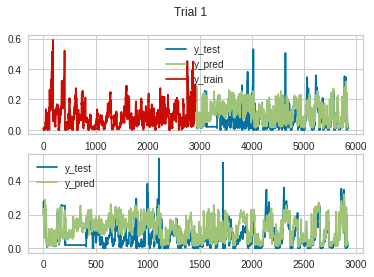

In [27]:
plt.subplot(2,1, 1)
plt.plot(np.arange(len(y_pred1)) + len(ytrain1),ytest1)
plt.plot(np.arange(len(y_pred1)) + len(ytrain1), y_pred1)
plt.plot(ytrain1)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred', 'y_train'])

plt.subplot(2,1,2)
#plot the predicted values
plt.plot(np.arange(len(y_pred1)),ytest1)
plt.plot(np.arange(len(y_pred1)), y_pred1)

# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred'])

plt.suptitle("Trial 1")
plt.show()

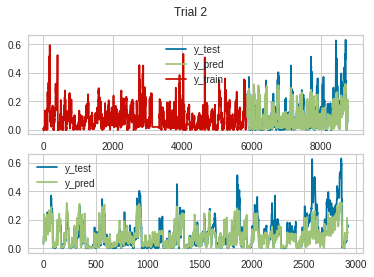

In [28]:
plt.subplot(2,1, 1)
plt.plot(np.arange(len(y_pred2)) + len(ytrain2),ytest2)
plt.plot(np.arange(len(y_pred2)) + len(ytrain2), y_pred2)
plt.plot(ytrain2)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred', 'y_train'])

plt.subplot(2,1,2)
#plot the predicted values
plt.plot(np.arange(len(y_pred2)),ytest2)
plt.plot(np.arange(len(y_pred2)), y_pred2)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred'])

plt.suptitle('Trial 2')
plt.show()

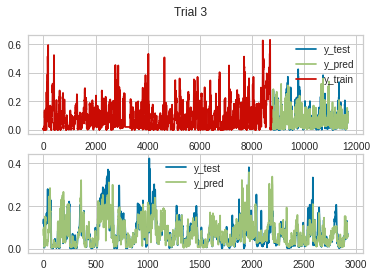

In [29]:
plt.subplot(2,1, 1)
plt.plot(np.arange(len(y_pred3)) + len(ytrain3),ytest3)
plt.plot(np.arange(len(y_pred3)) + len(ytrain3), y_pred3)
plt.plot(ytrain3)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred', 'y_train'])

plt.subplot(2,1,2)
#plot the predicted values
plt.plot(np.arange(len(y_pred3)),ytest3)
plt.plot(np.arange(len(y_pred3)), y_pred3)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred'])

plt.suptitle('Trial 3')
plt.show()

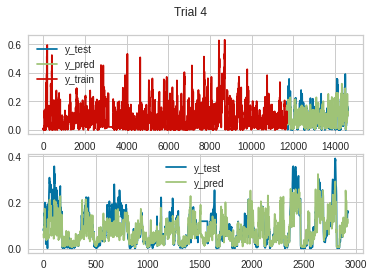

In [30]:
plt.subplot(2,1, 1)
plt.plot(np.arange(len(y_pred4)) + len(ytrain4),ytest4)
plt.plot(np.arange(len(y_pred4)) + len(ytrain4), y_pred4)
plt.plot(ytrain4)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred', 'y_train'])

plt.subplot(2,1,2)
#plot the predicted values
plt.plot(np.arange(len(y_pred4)),ytest4)
plt.plot(np.arange(len(y_pred4)), y_pred4)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred'])

plt.suptitle('Trial 4')
plt.show()

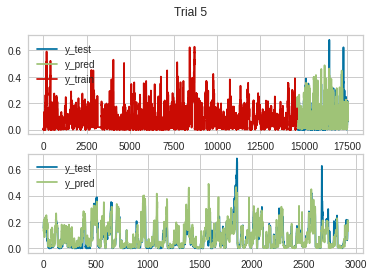

In [31]:
plt.subplot(2,1, 1)
plt.plot(np.arange(len(y_pred5)) + len(ytrain5),ytest5)
plt.plot(np.arange(len(y_pred5)) + len(ytrain5), y_pred5)
plt.plot(ytrain5)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred', 'y_train'])

plt.subplot(2,1,2)
#plot the predicted values
plt.plot(np.arange(len(y_pred5)),ytest5)
plt.plot(np.arange(len(y_pred5)), y_pred5)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred'])

plt.suptitle('Trial 5')
plt.show()

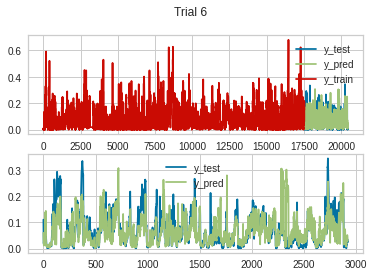

In [32]:
#trial 6
plt.subplot(2,1, 1)
plt.plot(np.arange(len(y_pred6)) + len(ytrain6),ytest6)
plt.plot(np.arange(len(y_pred6)) + len(ytrain6), y_pred6)
plt.plot(ytrain6)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred', 'y_train'])

plt.subplot(2,1,2)
#plot the predicted values
plt.plot(np.arange(len(y_pred6)),ytest6)
plt.plot(np.arange(len(y_pred6)), y_pred6)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred'])

plt.suptitle('Trial 6')
plt.show()

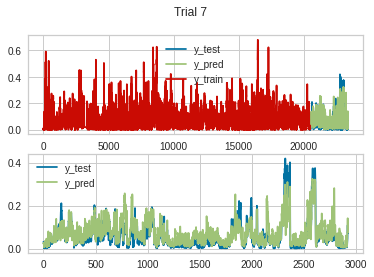

In [33]:
#trial 7
plt.subplot(2,1, 1)
plt.plot(np.arange(len(y_pred7)) + len(ytrain7),ytest7)
plt.plot(np.arange(len(y_pred7)) + len(ytrain7), y_pred7)
plt.plot(ytrain7)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred', 'y_train'])

plt.subplot(2,1,2)
#plot the predicted values
plt.plot(np.arange(len(y_pred7)),ytest7)
plt.plot(np.arange(len(y_pred7)), y_pred7)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred'])

plt.suptitle('Trial 7')
plt.show()

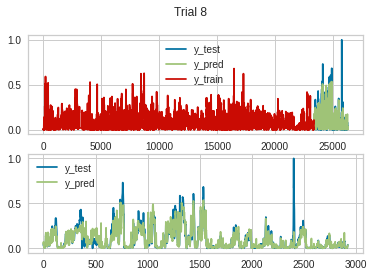

In [34]:
#trial 8
plt.subplot(2,1, 1)
plt.plot(np.arange(len(y_pred8)) + len(ytrain8),ytest8)
plt.plot(np.arange(len(y_pred8)) + len(ytrain8), y_pred8)
plt.plot(ytrain8)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred', 'y_train'])

plt.subplot(2,1,2)
#plot the predicted values
plt.plot(np.arange(len(y_pred8)),ytest8)
plt.plot(np.arange(len(y_pred8)), y_pred8)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred'])

plt.suptitle('Trial 8')
plt.show()

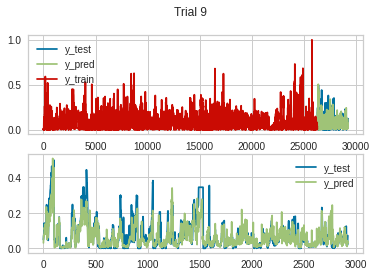

In [35]:
#trial 9
plt.subplot(2,1, 1)
plt.plot(np.arange(len(y_pred9)) + len(ytrain9),ytest9)
plt.plot(np.arange(len(y_pred9)) + len(ytrain9), y_pred9)
plt.plot(ytrain9)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred', 'y_train'])

plt.subplot(2,1,2)
#plot the predicted values
plt.plot(np.arange(len(y_pred9)),ytest9)
plt.plot(np.arange(len(y_pred9)), y_pred9)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred'])

plt.suptitle('Trial 9')
plt.show()

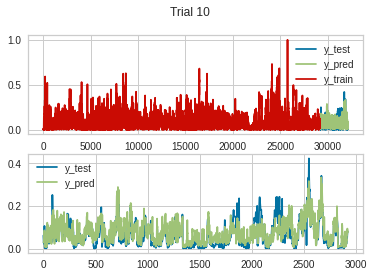

In [36]:
#trial 10
plt.subplot(2,1, 1)
plt.plot(np.arange(len(y_pred10)) + len(ytrain10),ytest10)
plt.plot(np.arange(len(y_pred10)) + len(ytrain10), y_pred10)
plt.plot(ytrain10)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred', 'y_train'])

plt.subplot(2,1,2)
#plot the predicted values
plt.plot(np.arange(len(y_pred10)),ytest10)
plt.plot(np.arange(len(y_pred10)), y_pred10)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred'])

plt.suptitle('Trial 10')
plt.show()

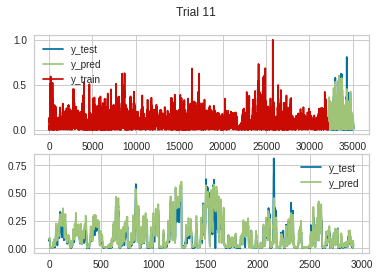

In [37]:
#trial 11
plt.subplot(2,1, 1)
plt.plot(np.arange(len(y_pred11)) + len(ytrain11),ytest11)
plt.plot(np.arange(len(y_pred11)) + len(ytrain11), y_pred11)
plt.plot(ytrain11)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred', 'y_train'])

plt.subplot(2,1,2)
#plot the predicted values
plt.plot(np.arange(len(y_pred11)),ytest11)
plt.plot(np.arange(len(y_pred11)), y_pred11)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred'])

plt.suptitle('Trial 11')
plt.show()

In [38]:
#residuals
res1 = ytest1 - y_pred1
res2 = ytest2 - y_pred2
res3 = ytest3 - y_pred3
res4 = ytest4 - y_pred4
res5 = ytest5 - y_pred5
res6 = ytest6 - y_pred6
res7 = ytest7 - y_pred7
res8 = ytest8 - y_pred8
res9 = ytest9 - y_pred9
res10 = ytest10 - y_pred10
res11 = ytest11 - y_pred11

residuals = [res1,res2,res3,res4,res5,res6,res7,res8,res9,res10,res11]
ypredict = [y_pred1, y_pred2,y_pred3, y_pred4, y_pred5, y_pred6, y_pred7, y_pred8, y_pred9, y_pred10, y_pred11]

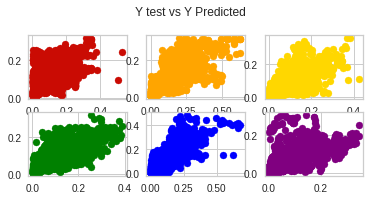

In [39]:
#Plot of test values vs predicted values
#for trials 1-6
plt.subplot(3, 3, 1)
plt.scatter(ytest1, y_pred1, color='r')
 
plt.subplot(3, 3, 2)
plt.scatter(ytest2, y_pred2, color = 'orange')
 
plt.subplot(3, 3, 3)
plt.scatter(ytest3, y_pred3, color = 'gold')
 
plt.subplot(3, 3, 4)
plt.scatter(ytest4, y_pred4, color = 'green')

plt.subplot(3, 3, 5)
plt.scatter(ytest5, y_pred5, color = 'blue')

plt.subplot(3, 3, 6)
plt.scatter(ytest6, y_pred6, color = 'purple')

 
plt.suptitle("Y test vs Y Predicted")
plt.show()

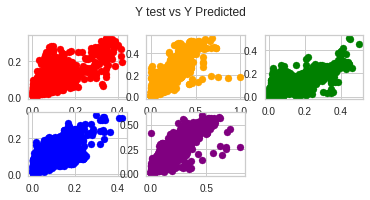

In [40]:
#Plot of test values vs predicted values
#for trials 7-11
plt.subplot(3, 3, 1)
plt.scatter(ytest7, y_pred7, color ='red')
 
plt.subplot(3, 3, 2)
plt.scatter(ytest8, y_pred8, color ='orange')
 
plt.subplot(3, 3, 3)
plt.scatter(ytest9, y_pred9, color = 'green')
 
plt.subplot(3, 3, 4)
plt.scatter(ytest10, y_pred10, color = 'blue')

plt.subplot(3, 3, 5)
plt.scatter(ytest11, y_pred11, color = 'purple')
 
plt.suptitle("Y test vs Y Predicted")
plt.show()

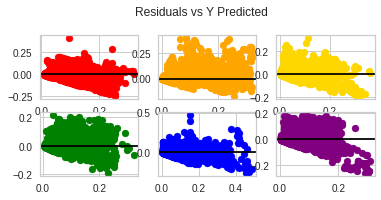

In [41]:
#Plot of residuals vs predicted values
plt.subplot(3, 3, 1)
plt.scatter(y_pred1, res1, color = 'red')
plt.axhline(y=0, color='black')
 
plt.subplot(3, 3, 2)
plt.scatter(y_pred2, res2, color = 'orange')
plt.axhline(y=0, color='black')
 
plt.subplot(3, 3, 3)
plt.scatter(y_pred3, res3, color = 'gold')
plt.axhline(y=0, color='black')
 
plt.subplot(3, 3, 4)
plt.scatter(y_pred4,res4, color = 'green')
plt.axhline(y=0, color='black')

plt.subplot(3, 3, 5)
plt.scatter(y_pred5,res5, color = 'blue')
plt.axhline(y=0, color='black')

plt.subplot(3, 3, 6)
plt.scatter(y_pred6,res6, color = 'purple')
plt.axhline(y=0, color='black')

 
plt.suptitle("Residuals vs Y Predicted")
plt.show()

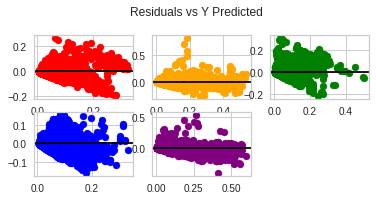

In [42]:
#Plot of residuals vs predicted values
x = 0 
plt.subplot(3, 3, 1)
plt.scatter(y_pred7, res7, color = 'red')
plt.axhline(y=0, color='black')
 
plt.subplot(3, 3, 2)
plt.scatter(y_pred8, res8, color = 'orange')
plt.axhline(y=0, color='black')
 
plt.subplot(3, 3, 3)
plt.scatter(y_pred9, res9, color = 'green')
plt.axhline(y=0, color='black')
 
plt.subplot(3, 3, 4)
plt.scatter(y_pred10,res10, color = 'blue')
plt.axhline(y=0, color='black')

plt.subplot(3, 3, 5)
plt.scatter(y_pred11,res11, color = 'purple')
plt.axhline(y=0, color='black')

#plot title and present
plt.suptitle("Residuals vs Y Predicted")
plt.show()

## Random Forest Regression Analysis 2

includes independent variables: SO2, NO2, CO, and O3

In [44]:
#setting the independent and dependent variables
x = data[['SO2', 'NO2','CO','O3']]
y = data['PM25'] 

In [45]:
#use training and test sets found in initial analysis
#based on testing 3 months of data at a time
#describing the independent variable 
xtrain1, xtest1 = data.iloc[:2922,5:9 ], data.iloc[2922:5844, 5:9]
xtrain2, xtest2 = data.iloc[:5844,5:9 ], data.iloc[5844:8766,5:9]
xtrain3, xtest3 = data.iloc[:8766,5:9 ], data.iloc[8766:11688,5:9 ]
xtrain4, xtest4 = data.iloc[:11688,5:9 ], data.iloc[11688:14610,5:9 ]
xtrain5, xtest5 = data.iloc[:14610,5:9 ], data.iloc[14610:17532,5:9 ]
xtrain6, xtest6 = data.iloc[:17532,5:9 ], data.iloc[17532:20454,5:9 ]
xtrain7, xtest7 = data.iloc[:20454,5:9 ], data.iloc[20454:23376,5:9 ]
xtrain8, xtest8 = data.iloc[:23376,5:9 ], data.iloc[23376:26298,5:9 ]
xtrain9, xtest9 = data.iloc[:26298,5:9 ], data.iloc[26298:29220,5:9 ]
xtrain10, xtest10 = data.iloc[:29220,5:9 ], data.iloc[29220:32142,5:9 ]
xtrain11, xtest11 = data.iloc[:32142,5:9 ], data.iloc[32142:35063,5:9 ]

#setting the dependent variable
ytrain1, ytest1 = data.iloc[:2922,3 ], data.iloc[2922:5844,3 ]
ytrain2, ytest2 = data.iloc[:5844, 3], data.iloc[5844:8766, 3]
ytrain3, ytest3 = data.iloc[:8766,3 ], data.iloc[8766:11688, 3]
ytrain4, ytest4 = data.iloc[:11688,3 ], data.iloc[11688:14610,3 ]
ytrain5, ytest5 = data.iloc[:14610,3 ], data.iloc[14610:17532, 3]
ytrain6, ytest6 = data.iloc[:17532,3 ], data.iloc[17532:20454,3 ]
ytrain7, ytest7 = data.iloc[:20454,3 ], data.iloc[20454:23376,3 ]
ytrain8, ytest8 = data.iloc[:23376,3 ], data.iloc[23376:26298,3 ]
ytrain9, ytest9 = data.iloc[:26298, 3], data.iloc[26298:29220,3 ]
ytrain10, ytest10 = data.iloc[:29220,3 ], data.iloc[29220:32142,3 ]
ytrain11, ytest11 = data.iloc[:32142,3 ], data.iloc[32142:35063, 3]

In [46]:
#create regressor object
#n_estimators = number of trees in the random forest
rndf = RandomForestRegressor(n_estimators = 100, random_state = 0)

# fit the regressor with x and y data
rf1 = rndf.fit(xtrain1, ytrain1)
#predict the values
y_pred1 = rf1.predict(xtest1)
#prediction metrics
rsquared1 = rf1.score(x,y)*100 
meanAbErr1 = metrics.mean_absolute_error(ytest1, y_pred1)
meanSqErr1 = metrics.mean_squared_error(ytest1, y_pred1)
rootMeanSqErr1 = np.sqrt(metrics.mean_squared_error(ytest1, y_pred1))
meanAbsPer1 = metrics.mean_absolute_percentage_error(ytest1, y_pred1)
r21 = metrics.r2_score(ytest1,y_pred1)
Adj_r21 = 1-(1-r21)*(len(xtrain1)-1)/(len(xtrain1)-9-1)

In [47]:
# fit the regressor with x and y data
rf2 = rndf.fit(xtrain2, ytrain2)
#predict the values
y_pred2 = rf2.predict(xtest2)
#prediction metrics
rsquared2 = rf2.score(x,y)*100 
meanAbErr2 = metrics.mean_absolute_error(ytest2, y_pred2)
meanSqErr2 = metrics.mean_squared_error(ytest2, y_pred2)
rootMeanSqErr2 = np.sqrt(metrics.mean_squared_error(ytest2, y_pred2))
meanAbsPer2 = metrics.mean_absolute_percentage_error(ytest2, y_pred2)
r22 = metrics.r2_score(ytest2,y_pred2)
Adj_r22 = 1-(1-r22)*(len(xtrain2)-1)/(len(xtrain2)-9-1)

In [48]:
# fit the regressor with x and y data
rf3 = rndf.fit(xtrain3, ytrain3)
#predict the values
y_pred3 = rf3.predict(xtest3)
#prediction metrics
rsquared3 = rf3.score(x,y)*100 
meanAbErr3 = metrics.mean_absolute_error(ytest3, y_pred3)
meanSqErr3 = metrics.mean_squared_error(ytest3, y_pred3)
rootMeanSqErr3 = np.sqrt(metrics.mean_squared_error(ytest3, y_pred3))
meanAbsPer3 = metrics.mean_absolute_percentage_error(ytest3, y_pred3)
r23 = metrics.r2_score(ytest3,y_pred3)
Adj_r23 = 1-(1-r23)*(len(xtrain3)-1)/(len(xtrain3)-9-1)

In [49]:
# fit the regressor with x and y data
rf4 = rndf.fit(xtrain4, ytrain4)
#predict the values
y_pred4 = rf4.predict(xtest4)
#prediction metrics
rsquared4 = rf4.score(x,y)*100 
meanAbErr4 = metrics.mean_absolute_error(ytest4, y_pred4)
meanSqErr4 = metrics.mean_squared_error(ytest4, y_pred4)
rootMeanSqErr4 = np.sqrt(metrics.mean_squared_error(ytest4, y_pred4))
meanAbsPer4 = metrics.mean_absolute_percentage_error(ytest4, y_pred4)
r24 = metrics.r2_score(ytest4,y_pred4)
Adj_r24 = 1-(1-r24)*(len(xtrain4)-1)/(len(xtrain4)-9-1)

In [50]:
# fit the regressor with x and y data
rf5 = rndf.fit(xtrain5, ytrain5)
#predict the values
y_pred5 = rf5.predict(xtest5)
#prediction metrics
rsquared5 = rf5.score(x,y)*100 
meanAbErr5 = metrics.mean_absolute_error(ytest5, y_pred5)
meanSqErr5 = metrics.mean_squared_error(ytest5, y_pred5)
rootMeanSqErr5 = np.sqrt(metrics.mean_squared_error(ytest5, y_pred5))
meanAbsPer5 = metrics.mean_absolute_percentage_error(ytest5, y_pred5)
r25 = metrics.r2_score(ytest5,y_pred5)
Adj_r25 = 1-(1-r25)*(len(xtrain5)-1)/(len(xtrain5)-9-1)

In [51]:
# fit the regressor with x and y data
rf6 = rndf.fit(xtrain6, ytrain6)
#predict the values
y_pred6 = rf6.predict(xtest6)
#prediction metrics
rsquared6 = rf6.score(x,y)*100 
meanAbErr6 = metrics.mean_absolute_error(ytest6, y_pred6)
meanSqErr6 = metrics.mean_squared_error(ytest6, y_pred6)
rootMeanSqErr6 = np.sqrt(metrics.mean_squared_error(ytest6, y_pred6))
meanAbsPer6 = metrics.mean_absolute_percentage_error(ytest6, y_pred6)
r26 = metrics.r2_score(ytest6,y_pred6)
Adj_r26 = 1-(1-r26)*(len(xtrain6)-1)/(len(xtrain6)-9-1)

In [52]:
# fit the regressor with x and y data
rf7 = rndf.fit(xtrain7, ytrain7)
#predict the values
y_pred7 = rf7.predict(xtest7)
#prediction metrics
rsquared7 = rf7.score(x,y)*100 
meanAbErr7 = metrics.mean_absolute_error(ytest7, y_pred7)
meanSqErr7 = metrics.mean_squared_error(ytest7, y_pred7)
rootMeanSqErr7 = np.sqrt(metrics.mean_squared_error(ytest7, y_pred7))
meanAbsPer7 = metrics.mean_absolute_percentage_error(ytest7, y_pred7)
r27 = metrics.r2_score(ytest7,y_pred7)
Adj_r27 = 1-(1-r27)*(len(xtrain7)-1)/(len(xtrain7)-9-1)

In [53]:
# fit the regressor with x and y data
rf8 = rndf.fit(xtrain8, ytrain8)
#predict the values
y_pred8 = rf8.predict(xtest8)
#prediction metrics
rsquared8 = rf8.score(x,y)*100 
meanAbErr8 = metrics.mean_absolute_error(ytest8, y_pred8)
meanSqErr8 = metrics.mean_squared_error(ytest8, y_pred8)
rootMeanSqErr8 = np.sqrt(metrics.mean_squared_error(ytest8, y_pred8))
meanAbsPer8 = metrics.mean_absolute_percentage_error(ytest8, y_pred8)
r28 = metrics.r2_score(ytest8,y_pred8)
Adj_r28 = 1-(1-r28)*(len(xtrain8)-1)/(len(xtrain8)-9-1)

In [54]:
# fit the regressor with x and y data
rf9 = rndf.fit(xtrain9, ytrain9)
#predict the values
y_pred9 = rf9.predict(xtest9)
#prediction metrics
rsquared9 = rf9.score(x,y)*100 
meanAbErr9 = metrics.mean_absolute_error(ytest9, y_pred9)
meanSqErr9 = metrics.mean_squared_error(ytest9, y_pred9)
rootMeanSqErr9 = np.sqrt(metrics.mean_squared_error(ytest9, y_pred9))
meanAbsPer9 = metrics.mean_absolute_percentage_error(ytest9, y_pred9)
r29 = metrics.r2_score(ytest9,y_pred9)
Adj_r29 = 1-(1-r29)*(len(xtrain9)-1)/(len(xtrain9)-9-1)

In [55]:
# fit the regressor with x and y data
rf10 = rndf.fit(xtrain10, ytrain10)
#predict the values
y_pred10 = rf10.predict(xtest10)
#prediction metrics
rsquared10 = rf10.score(x,y)*100 
meanAbErr10 = metrics.mean_absolute_error(ytest10, y_pred10)
meanSqErr10 = metrics.mean_squared_error(ytest10, y_pred10)
rootMeanSqErr10 = np.sqrt(metrics.mean_squared_error(ytest10, y_pred10))
meanAbsPer10 = metrics.mean_absolute_percentage_error(ytest10, y_pred10)
r210 = metrics.r2_score(ytest10,y_pred10)
Adj_r210 = 1-(1-r210)*(len(xtrain10)-1)/(len(xtrain10)-9-1)

In [56]:
# fit the regressor with x and y data
rf11 = rndf.fit(xtrain11, ytrain11)
#predict the values
y_pred11 = rf11.predict(xtest11)
#prediction metrics
rsquared11 = rf11.score(x,y)*100 
meanAbErr11 = metrics.mean_absolute_error(ytest11, y_pred11)
meanSqErr11 = metrics.mean_squared_error(ytest11, y_pred11)
rootMeanSqErr11 = np.sqrt(metrics.mean_squared_error(ytest11, y_pred11))
meanAbsPer11 = metrics.mean_absolute_percentage_error(ytest11, y_pred11)
r211 = metrics.r2_score(ytest11,y_pred11)
Adj_r211 = 1-(1-r211)*(len(xtrain11)-1)/(len(xtrain11)-9-1)

In [57]:
trial = [1,2,3,4,5,6,7,8,9,10,11]
R2 = [r21, r22, r23, r24, r25, r26, r27,r28,r29,r210,r211]
AdjR2 = [Adj_r21, Adj_r22, Adj_r23, Adj_r24, Adj_r25, Adj_r26, Adj_r27, Adj_r28, Adj_r29, Adj_r210, Adj_r211]
rsquared = [rsquared1,rsquared2,rsquared3,rsquared4, rsquared5, rsquared6, rsquared7, rsquared8, rsquared9, rsquared10, rsquared11]
MAE = [meanAbErr1,meanAbErr2,meanAbErr3,meanAbErr4,meanAbErr5,meanAbErr6,meanAbErr7,meanAbErr8,meanAbErr9,meanAbErr10,meanAbErr11]
MSE = [meanSqErr1,meanSqErr2,meanSqErr3,meanSqErr4,meanSqErr5,meanSqErr6,meanSqErr7,meanSqErr8,meanSqErr9,meanSqErr10,meanSqErr11]
RMSE = [rootMeanSqErr1,rootMeanSqErr2,rootMeanSqErr3,rootMeanSqErr4,rootMeanSqErr5,rootMeanSqErr6,rootMeanSqErr7,rootMeanSqErr8,rootMeanSqErr9,rootMeanSqErr10,rootMeanSqErr11]
MAPE = [meanAbsPer1,meanAbsPer2,meanAbsPer3,meanAbsPer4,meanAbsPer5,meanAbsPer6, meanAbsPer7, meanAbsPer8, meanAbsPer9, meanAbsPer10, meanAbsPer11]

results = pd.DataFrame({'Trial': trial, 'R-Squared': R2,'Adjusted R2':AdjR2, 'Mean Absolute Error':MAE, 'Mean Absolute Percentage Error':MAPE, 'Mean Square Error': MSE, 'Root Mean Square Error': RMSE})
results

,Trial,R-Squared,Adjusted R2,Mean Absolute Error,Mean Absolute Percentage Error,Mean Square Error,Root Mean Square Error
0,1,-0.007003,-0.010115,0.051834,3.505591e+00,0.005139,0.071686
1,2,0.589472,0.588839,0.045777,1.660258e+00,0.004906,0.070040
2,3,0.497441,0.496924,0.030285,7.513625e-01,0.002275,0.047696
3,4,0.489748,0.489354,0.035738,8.070927e-01,0.002785,0.052775
4,5,0.624723,0.624492,0.037568,1.648234e+00,0.003234,0.056868
5,6,0.392792,0.392481,0.029759,9.787168e-01,0.002355,0.048530
6,7,0.624708,0.624543,0.027155,1.223393e+00,0.001646,0.040567
7,8,0.769852,0.769763,0.034700,1.033505e+00,0.003613,0.060109
8,9,0.610162,0.610028,0.032362,1.244605e+00,0.002692,0.051881
9,10,0.439179,0.439006,0.029853,1.122657e+00,0.001813,0.042584


Text(0.5, 0, 'Random Forest Feature Importance')

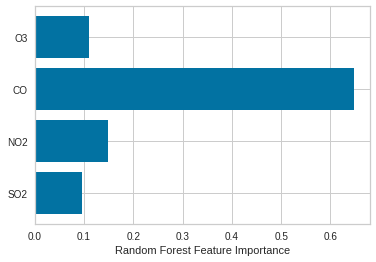

In [60]:
#check feature importance
feat = rndf.feature_importances_
x = ['SO2', 'NO2','CO','O3']

plt.barh(x, feat)
plt.xlabel("Random Forest Feature Importance")

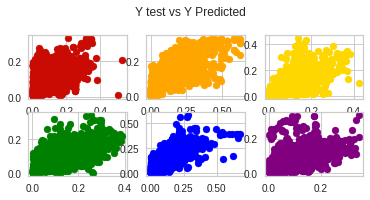

In [61]:
#Plot of test values vs predicted values
#for trials 1-6
plt.subplot(3, 3, 1)
plt.scatter(ytest1, y_pred1, color='r')
 
plt.subplot(3, 3, 2)
plt.scatter(ytest2, y_pred2, color = 'orange')
 
plt.subplot(3, 3, 3)
plt.scatter(ytest3, y_pred3, color = 'gold')
 
plt.subplot(3, 3, 4)
plt.scatter(ytest4, y_pred4, color = 'green')

plt.subplot(3, 3, 5)
plt.scatter(ytest5, y_pred5, color = 'blue')

plt.subplot(3, 3, 6)
plt.scatter(ytest6, y_pred6, color = 'purple')

 
plt.suptitle("Y test vs Y Predicted")
plt.show()

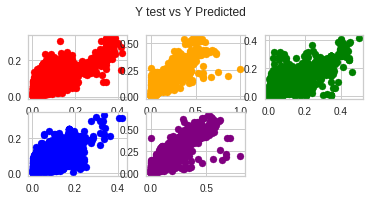

In [62]:
#Plot of test values vs predicted values
#for trials 7-11
plt.subplot(3, 3, 1)
plt.scatter(ytest7, y_pred7, color ='red')
 
plt.subplot(3, 3, 2)
plt.scatter(ytest8, y_pred8, color ='orange')
 
plt.subplot(3, 3, 3)
plt.scatter(ytest9, y_pred9, color = 'green')
 
plt.subplot(3, 3, 4)
plt.scatter(ytest10, y_pred10, color = 'blue')

plt.subplot(3, 3, 5)
plt.scatter(ytest11, y_pred11, color = 'purple')
 
plt.suptitle("Y test vs Y Predicted")
plt.show()

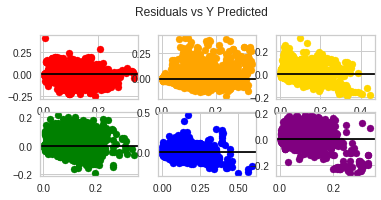

In [63]:
#Plot of residuals vs predicted values
plt.subplot(3, 3, 1)
plt.scatter(y_pred1, res1, color = 'red')
plt.axhline(y=0, color='black')
 
plt.subplot(3, 3, 2)
plt.scatter(y_pred2, res2, color = 'orange')
plt.axhline(y=0, color='black')
 
plt.subplot(3, 3, 3)
plt.scatter(y_pred3, res3, color = 'gold')
plt.axhline(y=0, color='black')
 
plt.subplot(3, 3, 4)
plt.scatter(y_pred4,res4, color = 'green')
plt.axhline(y=0, color='black')

plt.subplot(3, 3, 5)
plt.scatter(y_pred5,res5, color = 'blue')
plt.axhline(y=0, color='black')

plt.subplot(3, 3, 6)
plt.scatter(y_pred6,res6, color = 'purple')
plt.axhline(y=0, color='black')

 
plt.suptitle("Residuals vs Y Predicted")
plt.show()

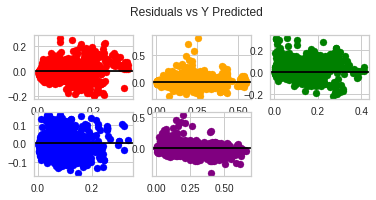

In [64]:
#Plot of residuals vs predicted values
x = 0 
plt.subplot(3, 3, 1)
plt.scatter(y_pred7, res7, color = 'red')
plt.axhline(y=0, color='black')
 
plt.subplot(3, 3, 2)
plt.scatter(y_pred8, res8, color = 'orange')
plt.axhline(y=0, color='black')
 
plt.subplot(3, 3, 3)
plt.scatter(y_pred9, res9, color = 'green')
plt.axhline(y=0, color='black')
 
plt.subplot(3, 3, 4)
plt.scatter(y_pred10,res10, color = 'blue')
plt.axhline(y=0, color='black')

plt.subplot(3, 3, 5)
plt.scatter(y_pred11,res11, color = 'purple')
plt.axhline(y=0, color='black')

#plot title and present
plt.suptitle("Residuals vs Y Predicted")
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


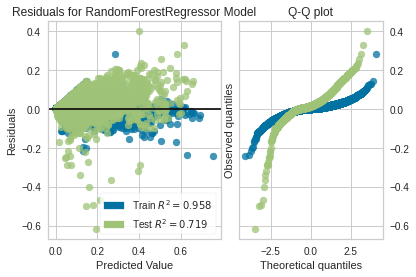

In [65]:
residual_1 = ytest1-y_pred1

visualizer = ResidualsPlot(rndf, hist=False, qqplot=True)
visualizer.fit(xtrain11, ytrain11)  # Fit the training data to the visualizer
visualizer.score(xtest11, ytest11)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure